## Info Awal

In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

In [3]:
df = pd.read_csv("used_car_data.csv")

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
d.count()

Name                 6019
Location             6019
Year                 6019
Kilometers_Driven    6019
Fuel_Type            6019
Transmission         6019
Owner_Type           6019
Mileage              6017
Engine               5983
Power                5983
Seats                5977
Price                6019
dtype: int64

In [4]:
d.shape

(6019, 12)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


## Cleaning

Jd tuh dari yg di atas, data yg kosong tu ada segini per kolom. Kalo sama aing si diapus ceritanya di sini.

In [6]:
d.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
data = d.dropna()
data.shape

(5975, 12)

Ini ceritanya mo ganti datatypenya Engine, Mileage, ama Power, cuman kok aq binun.

In [8]:
import re
import warnings
warnings.filterwarnings("ignore")

data['Engine'] = data['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
data['Engine'] = data['Engine'].astype(float)

data['Mileage'] = data['Mileage'].apply(lambda x: re.sub(r'(\d+.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
data['Mileage'] = data['Mileage'].astype(float)

data['Power'] = data['Power'].apply(lambda x: re.sub(r'(\d+|null)\s(bhp)', r'\1', str(x)))
data['Power'] = data['Power'].apply(lambda x: re.sub(r'(null)', r'0', str(x)))
data['Power'] = data['Power'].astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [10]:
data.describe(include = 'object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,5975,5975,5975,5975,5975
unique,1855,11,4,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,784,3195,4266,4903


In [11]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.172663,0.314417,-0.052538,0.069787,0.012338,0.305800
Kilometers_Driven,-0.172663,1.000000,-0.064991,0.090832,0.024375,0.083101,-0.011263
Mileage,0.314417,-0.064991,1.000000,-0.598638,-0.453399,-0.308226,-0.313877
Engine,-0.052538,0.090832,-0.598638,1.000000,0.842507,0.393435,0.659117
Power,0.069787,0.024375,-0.453399,0.842507,1.000000,0.108638,0.759749
Seats,0.012338,0.083101,-0.308226,0.393435,0.108638,1.000000,0.052262
Price,0.305800,-0.011263,-0.313877,0.659117,0.759749,0.052262,1.000000


Simpulan No. 7, tapi blm kuat argumen

Bisa jadi No. 10 jg.

# Liat Penyebaran Data

Ni mau liat persebaran datanya sblm diolah.

### Penyebaran kota

(Sekalian jawab No. 2)

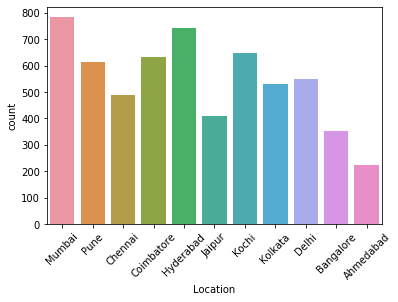

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [12]:
sns.countplot(data.Location)
plt.xticks(rotation = 45)

plt.show()
data.Location.value_counts()

### Penyebaran tahun

(Sekalian jwb No. 3)

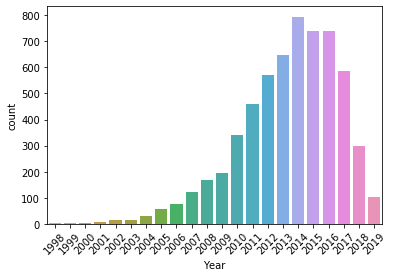

2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64

In [13]:
sns.countplot(data.Year)
plt.xticks(rotation = 45)

plt.show()
data.Year.value_counts()

### Penyebaran Merk + Nama
Ni ceritanya nama dulu, di bawahnya merk.

(Sekalian jwb No. 1)

In [14]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

data.Name.value_counts()

Mahindra XUV500 W8 2WD                                         49
Maruti Swift VDI                                               45
Honda City 1.5 S MT                                            34
Maruti Swift Dzire VDI                                         34
Maruti Swift VDI BSIV                                          31
Maruti Ritz VDi                                                30
Hyundai i10 Sportz                                             30
Toyota Fortuner 3.0 Diesel                                     29
Honda Amaze S i-Dtech                                          27
Hyundai Grand i10 Sportz                                       27
Maruti Ertiga VDI                                              25
Honda Brio S MT                                                25
Honda City 1.5 V MT                                            24
Hyundai Verna 1.6 SX                                           23
Maruti Wagon R VXI                                             23
Maruti Wag

In [15]:
data['Brand'] = data['Name'].str.split(" ",1).str.get(0)
data.Brand.value_counts()

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Ambassador          1
Bentley             1
Isuzu               1
Smart               1
Name: Brand, dtype: int64

### Penyebaran Fuel

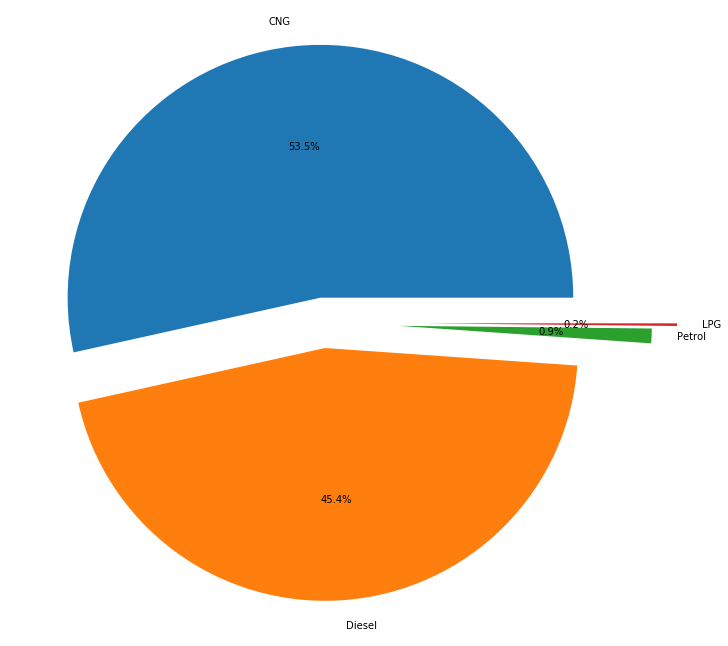

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [16]:
explode = (0.1, 0.1, 0.3, 0.4)

plt.figure(figsize = (10,10))
plt.pie(data['Fuel_Type'].value_counts(), 
        explode = explode,
        startangle = 0, 
        autopct = '%1.1f%%', 
        labels = data['Fuel_Type'].unique())

plt.tight_layout()
plt.show()
data.Fuel_Type.value_counts()

### Penyebaran Kepemilikan

(Sekalian jawab No. 8)

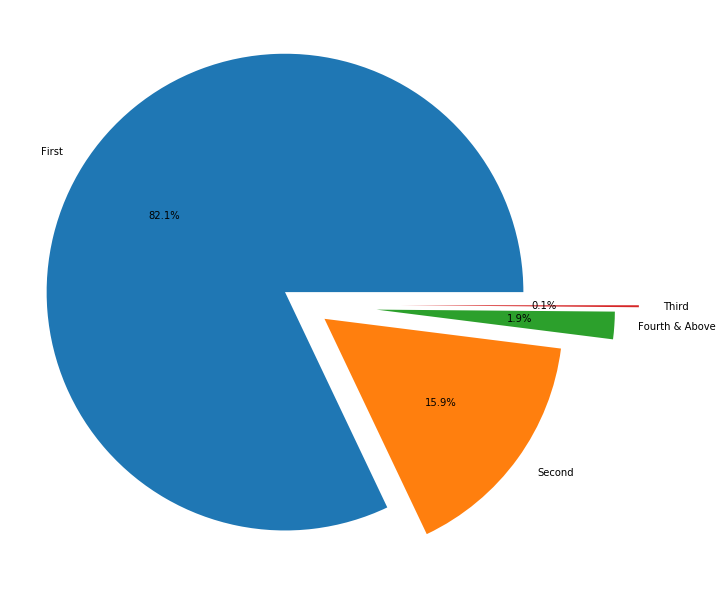

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [17]:
explode = (0.1, 0.1, 0.3, 0.4)

plt.figure(figsize = (10,10))
plt.pie(data['Owner_Type'].value_counts(), 
        explode = explode,
        startangle = 0, 
        autopct = '%1.1f%%',
        labels = data['Owner_Type'].unique())

plt.tight_layout()
plt.show()
data.Owner_Type.value_counts()

### Penyebaran Harga

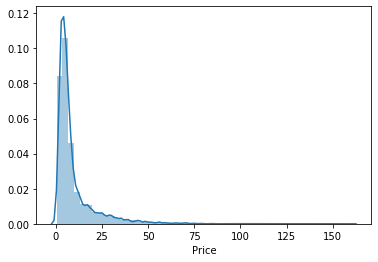

In [18]:
sns.distplot(data['Price'])
plt.show()

### Penyebaran Km

(Sekalian No. 4, 6)

In [19]:
dikit = data[data["Kilometers_Driven"] < 100000 ]     
dikit.Kilometers_Driven.count()

5431

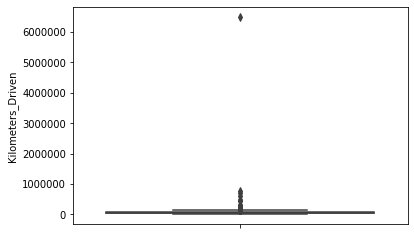

In [20]:
sns.boxplot(y = data['Kilometers_Driven'])
plt.show()

### Penyebaran Mileage

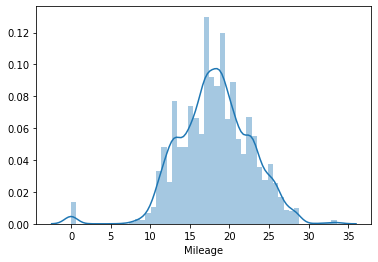

In [21]:
sns.distplot(data['Mileage'])
plt.show()

### Penyebaran Transmission

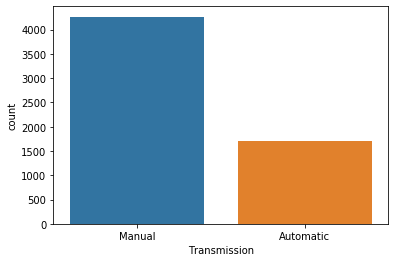

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

In [22]:
sns.countplot(data['Transmission'])
plt.show()
data.Transmission.value_counts()

### Penyebaran Seat

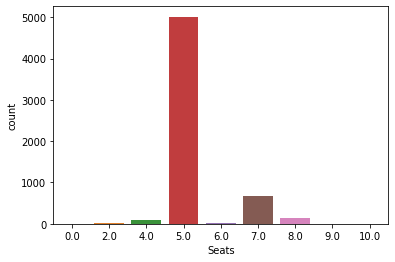

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [23]:
sns.countplot(data['Seats'])
plt.show()
data.Seats.value_counts()

## Jawab Soal Sisa

### 5. Rendah/Tinggi Jarak

Sebenernya cuma kepikiran antara
- jarak < median = rendah, jarak > median = tinggi
- jarak < mean = rendah, jarak > mean = tinggi

In [14]:
mini = df.Kilometers_Driven.min()
maks = df.Kilometers_Driven.max()
med = df.Kilometers_Driven.median()

print("Nilai jarak terendah: ", mini,
      "\nNilai tengah jarak: ", med,
      "\nNilai jarak tertinggi: ", maks)

Nilai jarak terendah:  171 
Nilai tengah jarak:  53000.0 
Nilai jarak tertinggi:  6500000


In [16]:
rendah = df.Kilometers_Driven.quantile(0.25)
tinggi = df.Kilometers_Driven.quantile(0.75)

print("Nilai kuartil bawah: ", rendah,
     "\nNilai kuartil atas: ", tinggi)

Nilai kuartil bawah:  34000.0 
Nilai kuartil atas:  73000.0


In [24]:
data.Kilometers_Driven.median()

53000.0

In [45]:
d.Kilometers_Driven.median()

53000.0

In [25]:
data.Kilometers_Driven.mean()

58674.3149790795

Ni yg bawah cuma nyobain jumlah mobil pake km yg median

In [26]:
coba1 = data[data["Kilometers_Driven"] < 53000 ]     
coba1.Kilometers_Driven.count()

2971

In [27]:
coba2 = data[data["Kilometers_Driven"] > 53000 ]     
coba2.Kilometers_Driven.count()

2980

### 7. Hubungan Tahun - KM

Ini sih harusnya nguatin soalnya masa banyak sama? E apa nda nguatin y

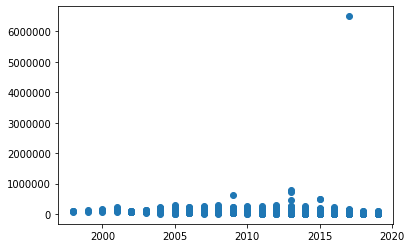

In [28]:
plt.scatter(x = 'Year', y = 'Kilometers_Driven', data = data)

plt.show()

### 9. Tipe fuel terhemat

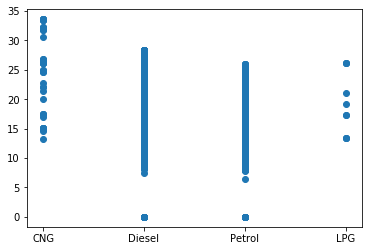

Fuel_Type
CNG       25.418036
Diesel    18.639484
LPG       19.385000
Petrol    17.483990
Name: Mileage, dtype: float64

In [29]:
plt.scatter(x = 'Fuel_Type', y = 'Mileage', data = data)

plt.show()
data.groupby('Fuel_Type')['Mileage'].mean()

### 10. Faktor berpengaruh ke harga

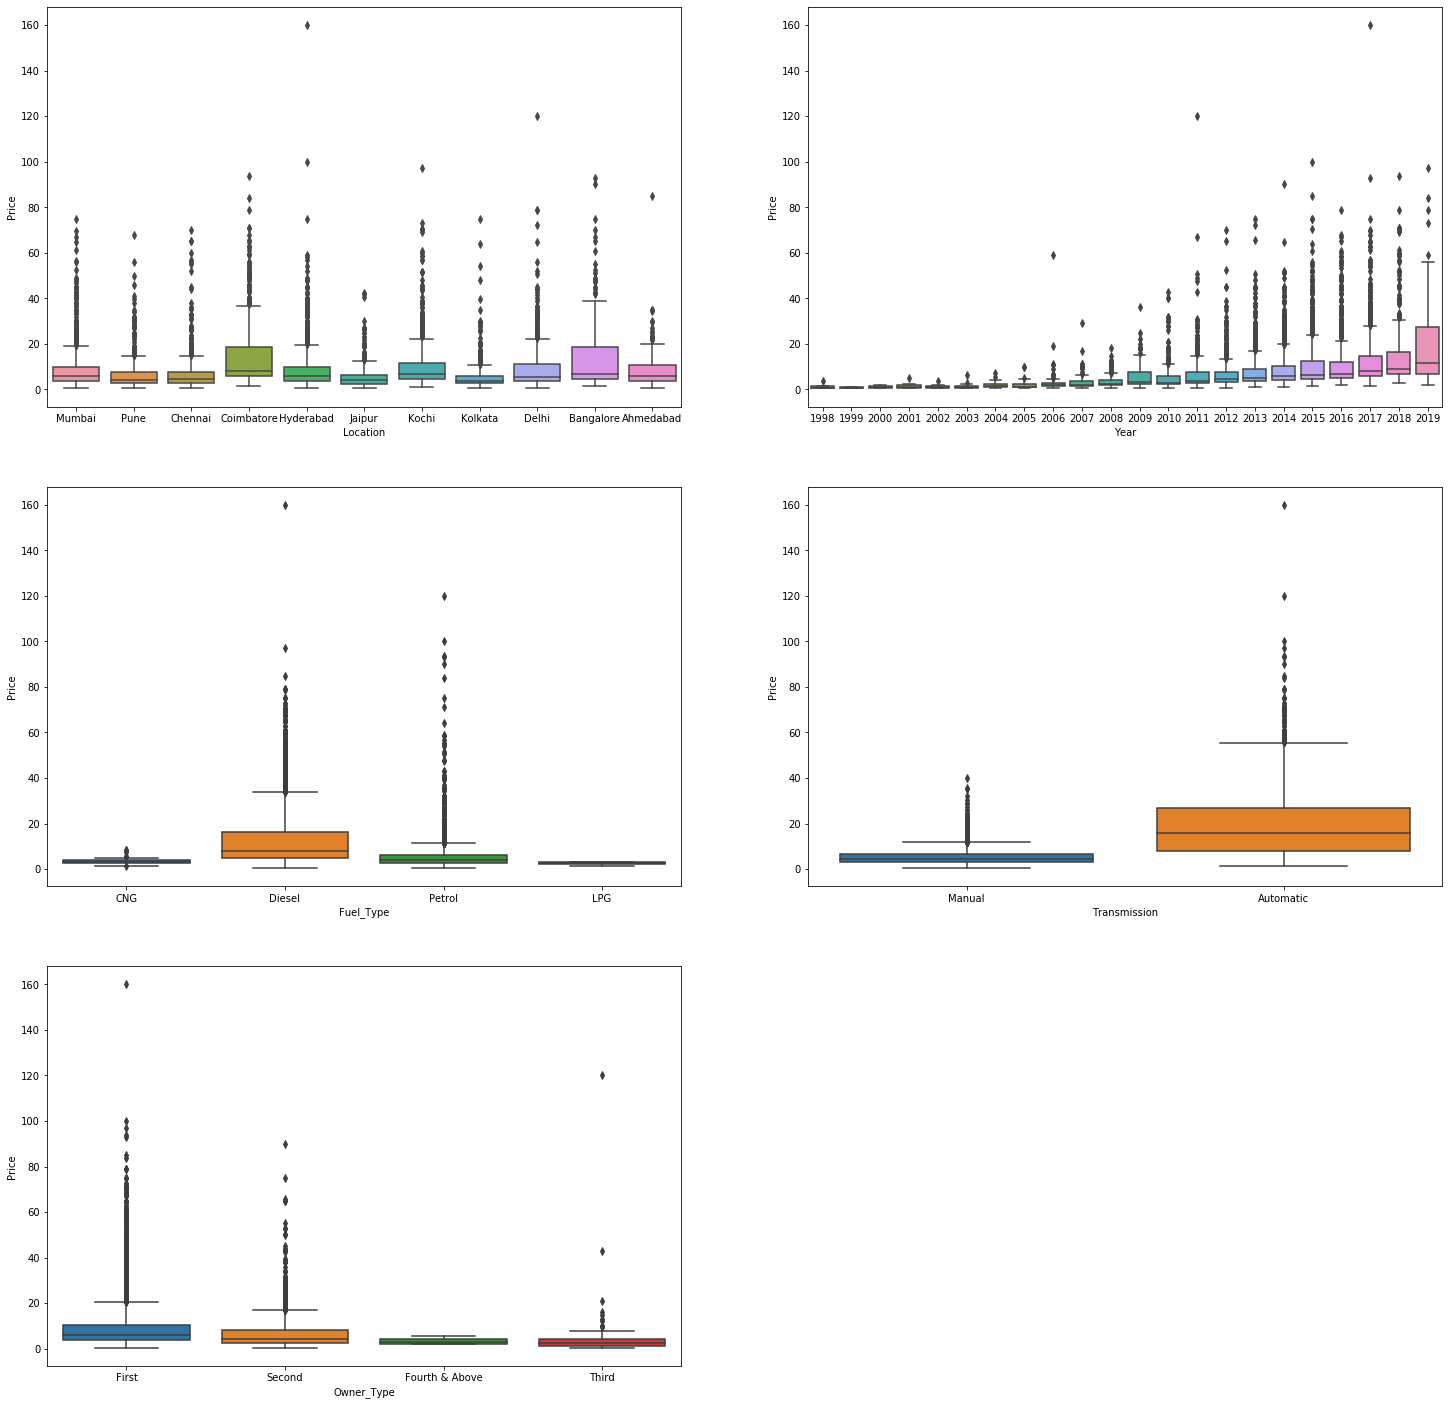

In [30]:
plt.figure(figsize = (25, 25))
ax = plt.subplot(3,2,1)
sns.boxplot(x='Location', y='Price', data=data, ax=ax)
ax = plt.subplot(3,2,2)
sns.boxplot(x='Year', y='Price', data=data, ax=ax)
ax = plt.subplot(3,2,3)
sns.boxplot(x='Fuel_Type', y='Price', data=data, ax=ax)
ax = plt.subplot(3,2,4)
sns.boxplot(x='Transmission', y='Price', data=data, ax=ax)
ax = plt.subplot(3,2,5)
sns.boxplot(x='Owner_Type', y='Price', data=data, ax=ax)

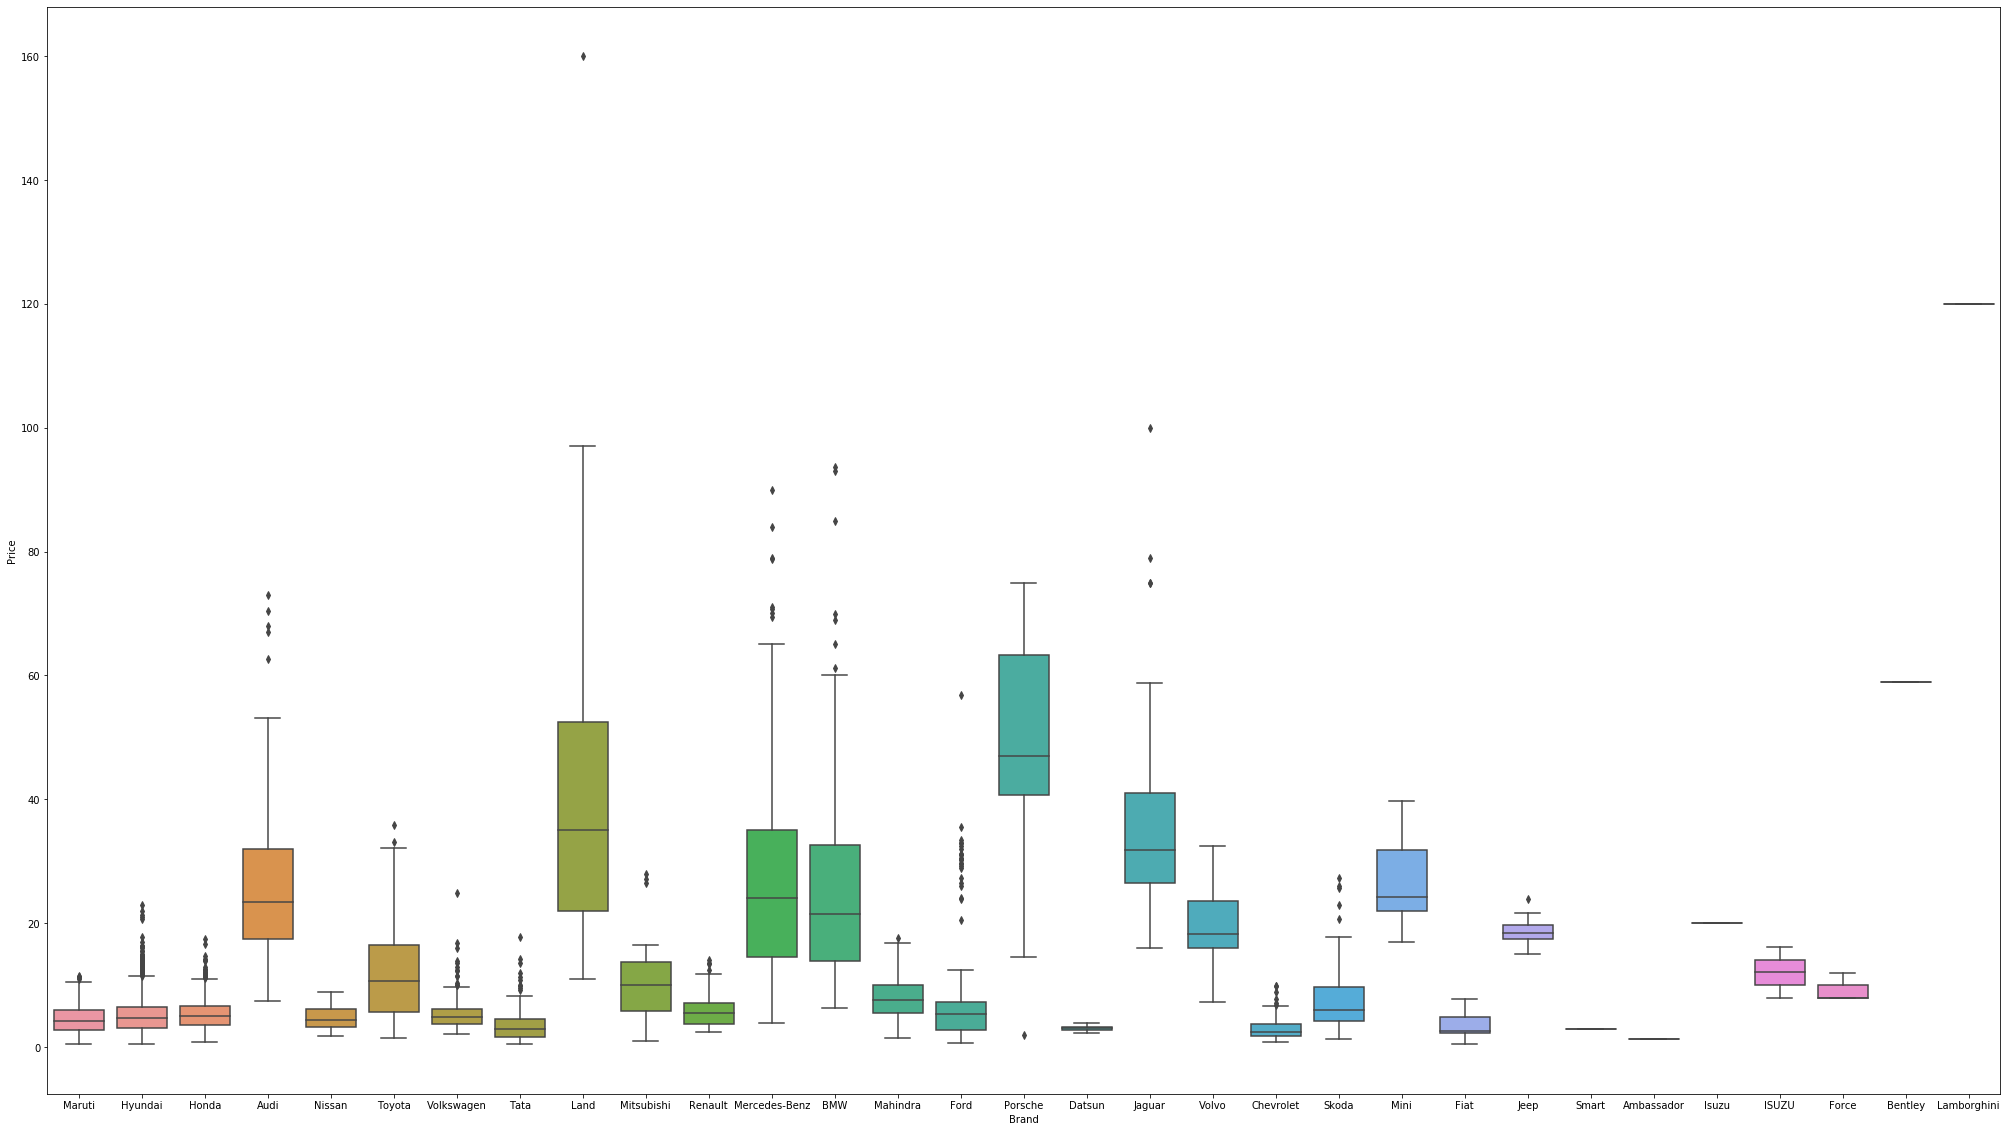

In [31]:
plt.figure(figsize = (35, 20))
sns.boxplot(x='Brand', y='Price', data=data)

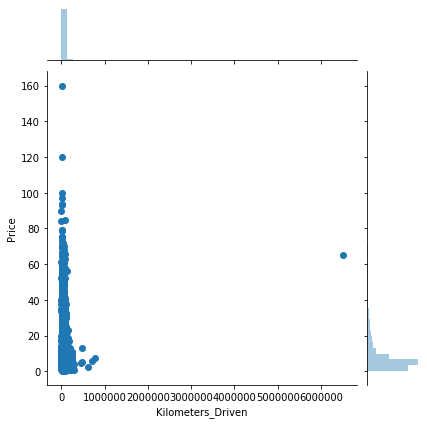

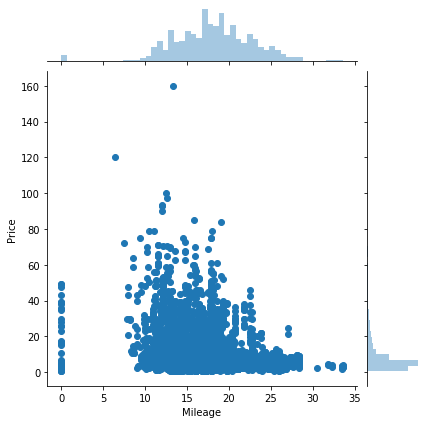

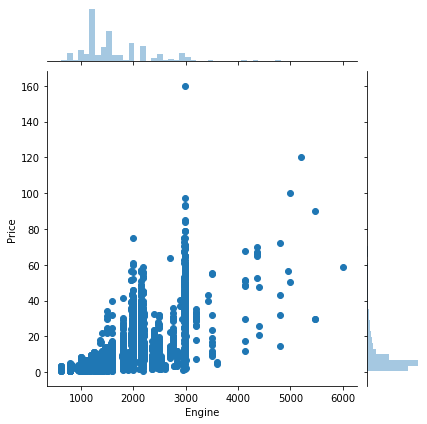

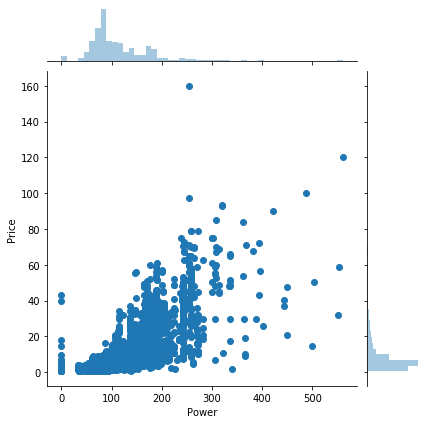

In [32]:
sns.jointplot(x='Kilometers_Driven', y='Price', data=data)
sns.jointplot(x='Mileage', y='Price', data=data)
sns.jointplot(x='Engine', y='Price', data=data)
sns.jointplot(x='Power', y='Price', data=data)

## DLL

In [33]:
data.groupby(["Brand", "Owner_Type"])['Name'].count()

Brand          Owner_Type    
Ambassador     Third                1
Audi           First              189
               Second              45
               Third                2
BMW            First              203
               Second              53
               Third                6
Bentley        First                1
Chevrolet      First               89
               Second              25
               Third                7
Datsun         First               13
Fiat           First               17
               Second               7
               Third                1
Force          First                3
Ford           First              232
               Fourth & Above       2
               Second              52
               Third               12
Honda          First              496
               Second              90
               Third               15
Hyundai        First              908
               Fourth & Above       1
               Secon

In [34]:
data.groupby(["Location", "Brand"])['Name'].count()

Location    Brand        
Ahmedabad   Audi              10
            BMW               15
            Chevrolet          2
            Ford               3
            Honda             26
            Hyundai           48
            Land               2
            Mahindra          10
            Maruti            50
            Mercedes-Benz      6
            Mini               1
            Nissan             2
            Renault            4
            Skoda              6
            Tata               9
            Toyota            18
            Volkswagen         9
            Volvo              2
Bangalore   Audi              32
            BMW               22
            Chevrolet          7
            Datsun             2
            Ford              16
            Honda             26
            Hyundai           79
            Jaguar             3
            Land               5
            Mahindra          19
            Maruti            32
            Merce

In [35]:
data.groupby(["Brand", "Fuel_Type"])['Name'].count()

Brand          Fuel_Type
Ambassador     Diesel         1
Audi           Diesel       217
               Petrol        19
BMW            Diesel       234
               Petrol        28
Bentley        Petrol         1
Chevrolet      Diesel        56
               Petrol        65
Datsun         Petrol        13
Fiat           Diesel        14
               Petrol        11
Force          Diesel         3
Ford           Diesel       204
               Petrol        94
Honda          Diesel       126
               Petrol       475
Hyundai        CNG            4
               Diesel       356
               LPG            5
               Petrol       735
ISUZU          Diesel         2
Isuzu          Diesel         1
Jaguar         Diesel        36
               Petrol         4
Jeep           Diesel        14
               Petrol         1
Lamborghini    Petrol         1
Land           Diesel        57
Mahindra       Diesel       261
               Petrol        10
Maruti         

In [36]:
data.groupby(["Brand", "Seats"])['Name'].count()

Brand          Seats
Ambassador     5.0         1
Audi           0.0         1
               2.0         2
               4.0         3
               5.0       192
               7.0        38
BMW            2.0         2
               4.0        16
               5.0       239
               7.0         5
Bentley        4.0         1
Chevrolet      4.0         4
               5.0       104
               7.0         5
               8.0         6
               9.0         1
               10.0        1
Datsun         5.0        10
               7.0         3
Fiat           5.0        25
Force          7.0         3
Ford           4.0         1
               5.0       259
               7.0        38
Honda          5.0       577
               7.0        24
Hyundai        5.0      1081
               7.0        19
ISUZU          5.0         2
Isuzu          7.0         1
Jaguar         2.0         1
               4.0         3
               5.0        36
Jeep           5.0    

In [37]:
data.groupby(["Year", "Brand"])['Name'].count()

Year  Brand        
1998  Maruti             3
      Mercedes-Benz      1
1999  Honda              1
      Maruti             1
2000  Mahindra           1
      Maruti             2
      Tata               1
2001  Fiat               1
      Honda              1
      Hyundai            2
      Mercedes-Benz      1
      Mitsubishi         1
      Toyota             1
2002  Ford               1
      Honda              1
      Hyundai            2
      Mahindra           1
      Maruti             6
      Skoda              2
      Toyota             1
2003  Ambassador         1
      Ford               1
      Hyundai            1
      Maruti             8
      Mercedes-Benz      1
      Mitsubishi         1
      Skoda              1
      Toyota             1
2004  Chevrolet          1
      Ford               2
      Honda              4
      Hyundai            4
      Maruti            10
      Mercedes-Benz      2
      Mitsubishi         1
      Tata               1
      To

In [38]:
data.groupby(["Location", "Owner_Type"])['Name'].count()

Location    Owner_Type    
Ahmedabad   First             185
            Second             38
Bangalore   First             229
            Fourth & Above      1
            Second            111
            Third              12
Chennai     First             334
            Fourth & Above      2
            Second            119
            Third              35
Coimbatore  First             569
            Fourth & Above      1
            Second             63
            Third               1
Delhi       First             453
            Second             94
            Third               2
Hyderabad   First             657
            Second             84
Jaipur      First             299
            Second             96
            Third              15
Kochi       First             611
            Second             34
            Third               3
Kolkata     First             499
            Second             31
Mumbai      First             651
            Fourth & 

In [39]:
data.groupby(["Location", "Year"])['Name'].count()

Location    Year
Ahmedabad   2002      1
            2004      1
            2005      2
            2007      4
            2008      9
            2009      9
            2010     10
            2011     13
            2012     26
            2013     27
            2014     37
            2015     33
            2016     25
            2017     18
            2018      7
            2019      1
Bangalore   2002      1
            2004      1
            2005      4
            2006      5
            2007      7
            2008     11
            2009     15
            2010     19
            2011     28
            2012     39
            2013     52
            2014     72
            2015     44
            2016     39
            2017     12
            2018      4
Chennai     2001      2
            2002      6
            2003      6
            2004      6
            2005      8
            2006     18
            2007     20
            2008     22
            2009     25

In [40]:
data.groupby(["Location", "Fuel_Type"])['Name'].count()

Location    Fuel_Type
Ahmedabad   CNG            3
            Diesel       138
            Petrol        82
Bangalore   Diesel       218
            Petrol       135
Chennai     CNG            2
            Diesel       289
            Petrol       199
Coimbatore  Diesel       356
            Petrol       278
Delhi       CNG           10
            Diesel       304
            Petrol       235
Hyderabad   CNG            3
            Diesel       506
            LPG            6
            Petrol       226
Jaipur      Diesel       230
            LPG            2
            Petrol       178
Kochi       CNG            8
            Diesel       303
            Petrol       337
Kolkata     Diesel       256
            Petrol       274
Mumbai      CNG           17
            Diesel       309
            LPG            1
            Petrol       457
Pune        CNG           13
            Diesel       286
            LPG            1
            Petrol       313
Name: Name, dtype: in

In [41]:
data.groupby(["Location", "Owner_Type", "Brand"])['Name'].count()

Location    Owner_Type      Brand        
Ahmedabad   First           Audi               5
                            BMW               10
                            Chevrolet          2
                            Ford               2
                            Honda             24
                            Hyundai           42
                            Mahindra           7
                            Maruti            46
                            Mercedes-Benz      4
                            Mini               1
                            Nissan             2
                            Renault            2
                            Skoda              4
                            Tata               7
                            Toyota            17
                            Volkswagen         8
                            Volvo              2
            Second          Audi               5
                            BMW                5
                           

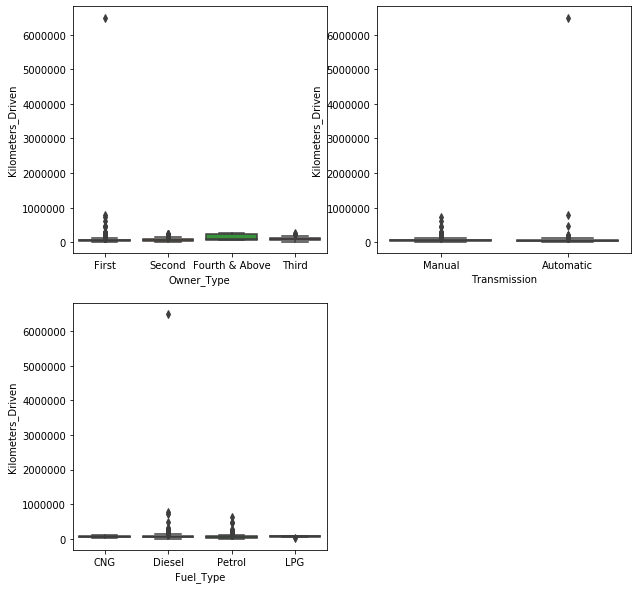

In [42]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(2,2,1)
sns.boxplot(x='Owner_Type', y='Kilometers_Driven', data=data, ax=ax)
ax = plt.subplot(2,2,2)
sns.boxplot(x='Transmission', y='Kilometers_Driven', data=data, ax=ax)
ax = plt.subplot(2,2,3)
sns.boxplot(x='Fuel_Type', y='Kilometers_Driven', data=data, ax=ax)

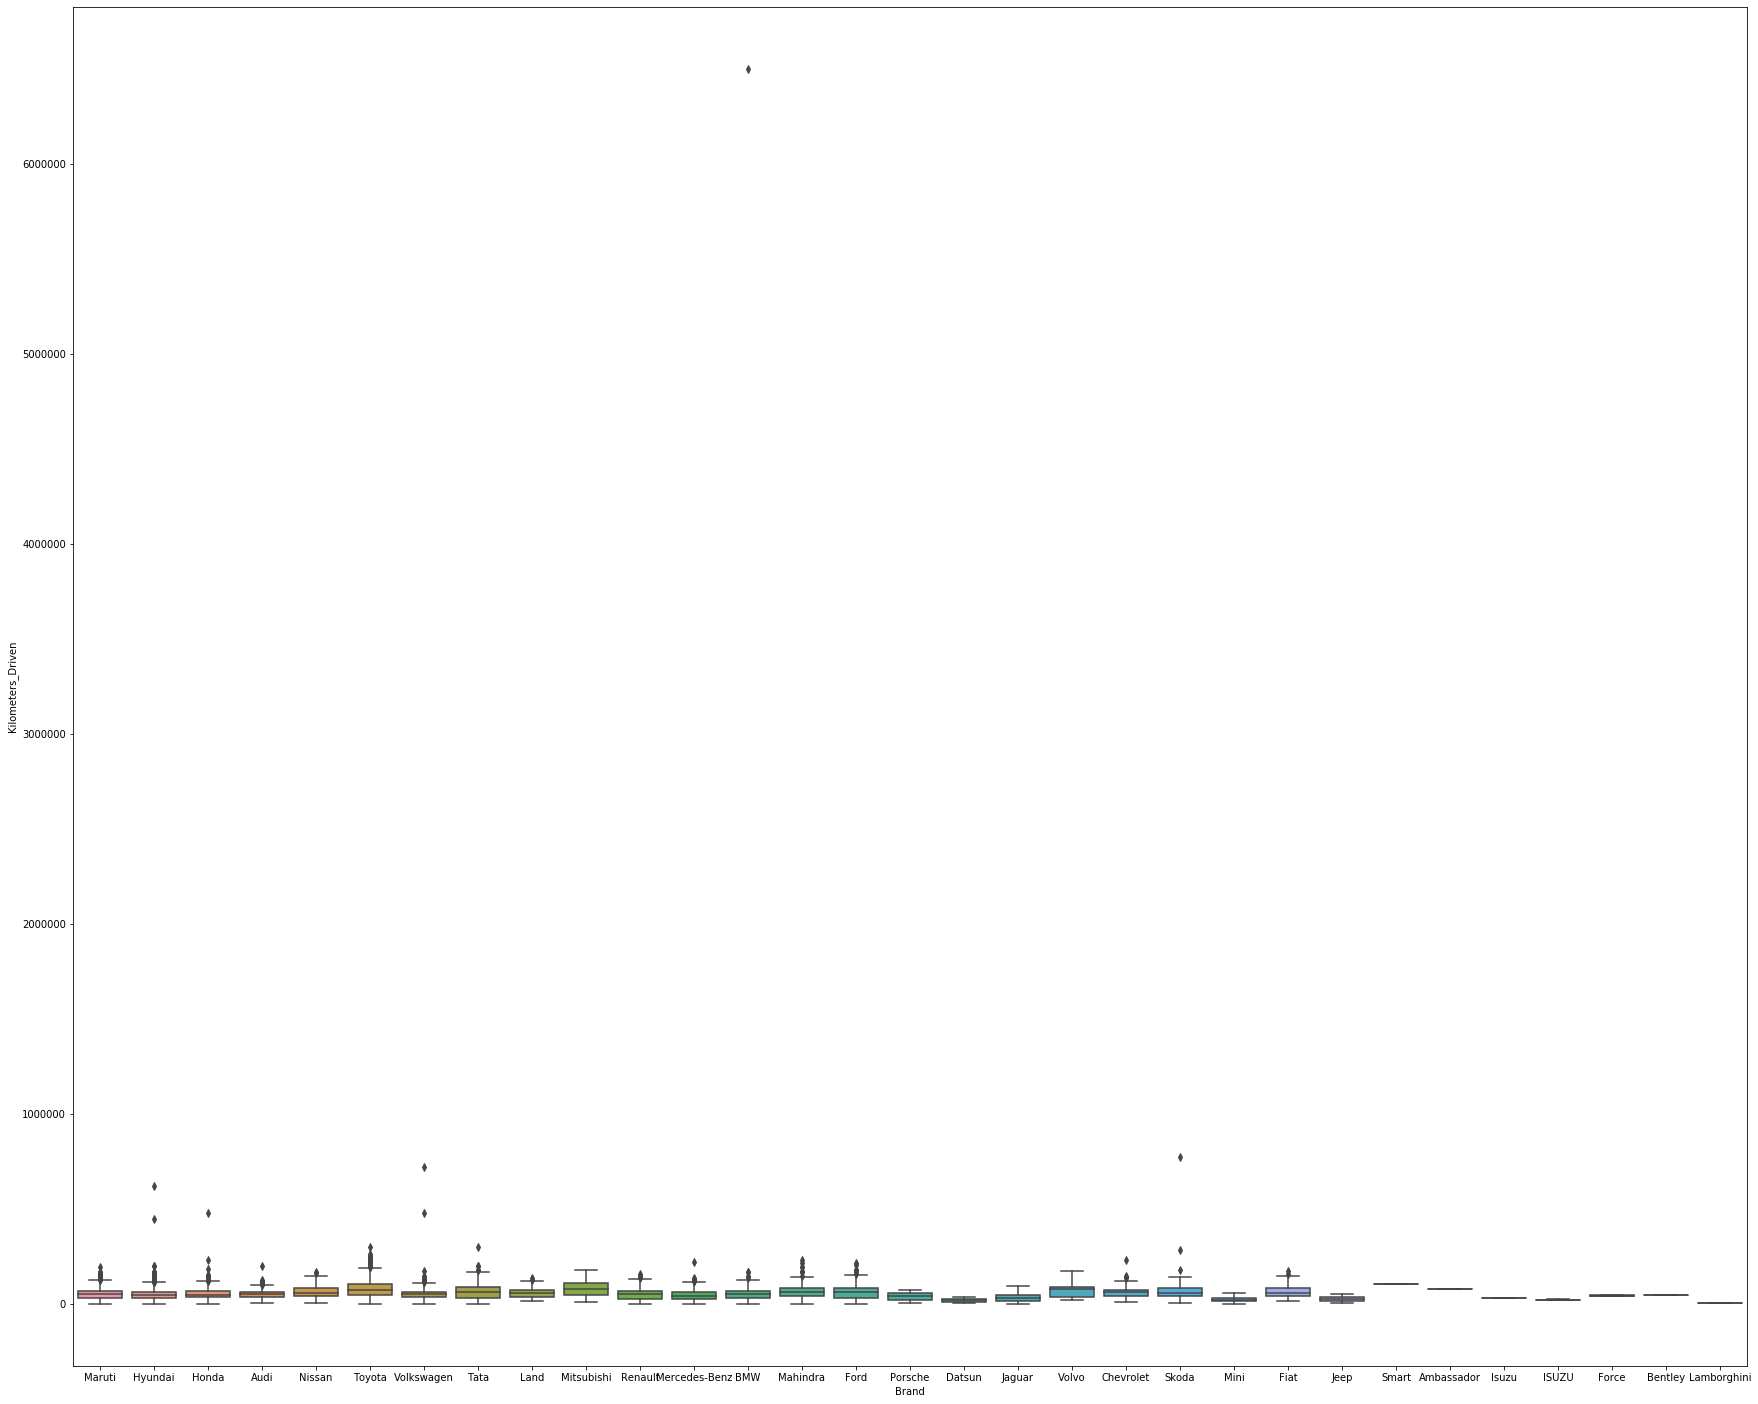

In [43]:
plt.figure(figsize = (30, 25))
sns.boxplot(x='Brand', y='Kilometers_Driven', data=data)

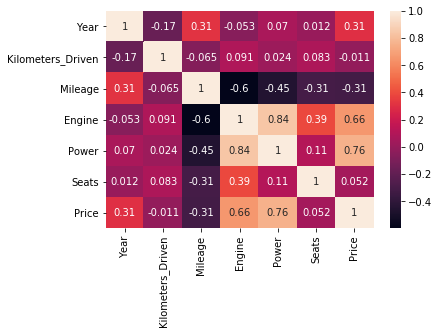

In [44]:
sns.heatmap(data.corr(), annot = True)
fig = plt.gcf
plt.show()

(To be continued)